In this section we will be working through linear regression with the following steps:

Step 1: Getting and setting up the data.<br>
Step 2: Visualizing current data.<br>
Step 3: The mathematics behind the Least Squares Method.<br>
Step 4: Using Numpy for a Univariate Linear Regression.<br>
Step 5: Getting the error.<br>
Step 6: Using scikit learn to implement a multivariate regression.<br>
Step 7: Using Training and Validation.  <br>
Step 8: Predicting Prices<br>
Step 9 : Residual Plots<br>

### Step 1 Getting and setting up the data

In [8]:
# standard import
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

In [9]:
# plot
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [5]:
# import data and scikit-learn module
from sklearn.datasets import load_boston

In [6]:
boston=load_boston()

In [6]:
# documentation for the dataset
# http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston
print boston.DESCR

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

### Step 2 Visualization

Text(0,0.5,'Number of houses')

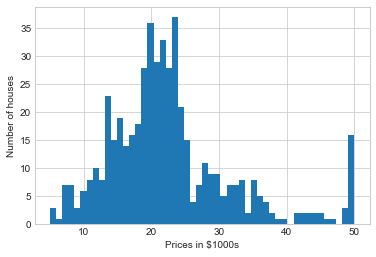

In [9]:
# visualization of the current dataset

# hist
plt.hist(boston.target,bins=50)
plt.xlabel('Prices in $1000s')
plt.ylabel('Number of houses')

Text(0,0.5,'Prices in $1000s')

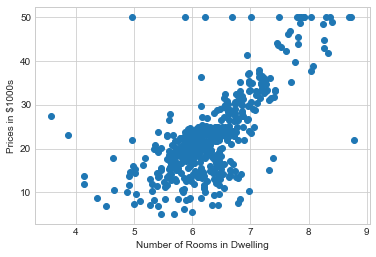

In [10]:
# a scatter plot of one single feature x v.s. the label y
# x = number of rooms in the dwelling in the 6th position

plt.scatter(boston.data[:,5],boston.target)
plt.xlabel('Number of Rooms in Dwelling')
plt.ylabel('Prices in $1000s')

In [10]:
# transform into dataframe and use seaborn lm to fit
boston_df = DataFrame(boston.data)
# specific to scikit learn dataset
boston_df.columns = boston.feature_names
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [11]:
boston_df['Price'] = boston.target

In [13]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


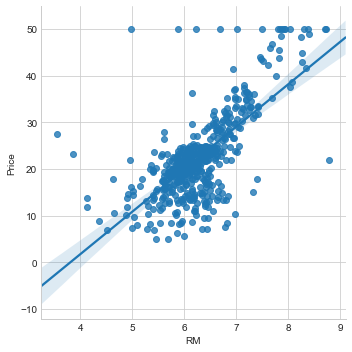

In [15]:
sns.lmplot('RM','Price',data = boston_df)

### Step4 Using Numpy for a univariate linear regression

In [22]:
# set up the X
X = boston_df['RM']
X.shape
# this is just a one dimensional array/series

(506L,)

In [23]:
# Needs to make it two-dimensional
X = np.vstack(boston_df.RM)
X.shape # 1 feature, 506 values

(506L, 1L)

In [24]:
Y =boston_df.Price

Remeber the linear algebra for univariate linear regression: <br>
\begin{equation*}
y = mx+b
\end{equation*}
In matrix form:<br>
\begin{equation*}
y = Ap \\
A = [x,1] \\
p= \left[
\begin{matrix}
m \\
b 
\end{matrix}
\right]
\end{equation*}
We'll use numpy to make the A matrix in the form [X,1] by call every value in our original X using a list comprehension and then set up an array in the form [X 1]

In [25]:
X = np.array([[value,1] for value in X])

In [26]:
X

array([[array([6.575]), 1],
       [array([6.421]), 1],
       [array([7.185]), 1],
       ...,
       [array([6.976]), 1],
       [array([6.794]), 1],
       [array([6.03]), 1]], dtype=object)

In [31]:
m,b = np.linalg.lstsq(X,Y, rcond = -1)[0]

In [32]:
m

9.102108981180315

In [33]:
b

-34.67062077643858

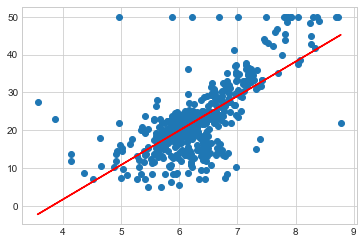

In [39]:
# first the scatter plot
plt.scatter(boston_df['RM'],boston_df['Price'])
# add fitted line
x =boston_df.RM
plt.plot(x,m*x+b,color ='red',label='Best Fit Line')


### Step 5 Getting the error

RMSE: is the sum squarred error divided by the number of elements and take the square.

In [41]:
# get the result array
result = np.linalg.lstsq(X,Y, rcond= -1)

In [43]:
# the total error is stored at index 1
result[1]

array([22061.87919621])

In [49]:
#RMSE
rmse = np.sqrt(result[1]/len(X))
print "The RMSE is %.2f" %(rmse)

The RMSE is 6.60


The formula for RMSE is similar to standard deviation. RMSE is similar to standard deviation. So given the number of rooms, we can find the estimated average house price, and we can say 95% of the house prices with the same number of the rooms do not vary beyond 2*RMSE from the estimated mean, meaning the prices are within $13,200 from the estimated average on the fitted regression line

### Step 6 Use scikit to implement mulitvariate linear regression

In [1]:
# import
import sklearn
from sklearn.linear_model import LinearRegression

In [2]:
# create a linear regression object
lreg = LinearRegression()

In [ ]:
# can type 'tab' to see methods available to this object
lreg.

In [13]:
# Data columns 
X_multi = boston_df.drop('Price',1)

In [14]:
Y_target = boston_df['Price']

In [15]:
# fit the model
lreg.fit(X_multi,Y_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [18]:
#Prin the estimated intercept and coeffient
print 'The estimated intercept is %.2f' %lreg.intercept_

The estimated intercept is 36.49


In [22]:
# Set a DataFrame to show the estimated coefficients for each feature
coef_df =DataFrame(boston_df.columns)
coef_df.columns = ['Features']

coef_df['Est. Coef'] = pd.Series(lreg.coef_)

In [23]:
coef_df

,Features,Est. Coef
0,CRIM,-0.107171
1,ZN,0.046395
2,INDUS,0.020860
3,CHAS,2.688561
4,NOX,-17.795759
5,RM,3.804752
6,AGE,0.000751
7,DIS,-1.475759
8,RAD,0.305655
9,TAX,-0.012329


In [27]:
# R square
lreg.score(X_multi,Y_target)

0.7406077428649428

The estimated linear regression model can explain 74.06% of the variations in the housing prices

### Step 7 Using training and validation

scikit learn has a built in function specifically for randomly splitting the dataset for training and validation purposes, and it is called train_test_split.

The parameters passed are your X and Y, then optionally test_size parameter, representing the proportion of the dataset to include in the test split. As well a train_size parameter. you can learn more about these parameters  http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html

In [28]:
from sklearn.cross_validation import train_test_split

C:\Users\Bingxin\Anaconda2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X_multi,Y_target)

In [30]:
X_train.shape

(379, 13)

In [32]:
X_test.shape

(127, 13)

In [33]:
Y_train.shape

(379L,)

In [34]:
Y_test.shape

(127L,)

### Step 8 Prediction

In [35]:
# model fitting
lreg = LinearRegression()

In [36]:
lreg.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [37]:
# prediction on both training and testing datasets
pred_train=lreg.predict(X_train)
pred_test = lreg.predict(X_test)

MSE: Mean squared error
is the mean of the squarred difference between observed and estimated y's

In [38]:
print 'Fit a model with X_train, the MSE for Y_train is %.2f' %(np.mean((Y_train-pred_train)**2))

Fit a model with X_train, the MSE for Y_train is 21.28


In [39]:
print 'Fit a model with X_train, the MSE for Y_test is %.2f' %(np.mean((Y_test-pred_test)**2))

Fit a model with X_train, the MSE for Y_test is 25.36


### Step 9 Residual Plots

Text(0.5,1,'Residual Plots')

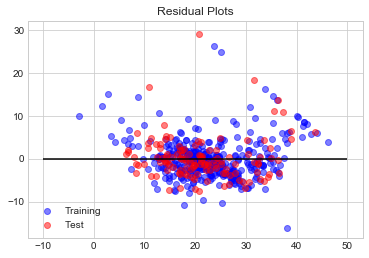

In [41]:
# scatter plot of the training error against Yhat
train = plt.scatter(pred_train,(Y_train- pred_train),color = 'b',alpha = 0.5)
# scatter plot of the prediction error against Yhat
test = plt.scatter(pred_test,(Y_test- pred_test),color = 'red',alpha = 0.5)

# plot a horiontal line at 0
plt.hlines(y = 0,xmin = -10,xmax= 50)

#labels
plt.legend((train,test),('Training','Test'),loc = 'lower left')
plt.title('Residual Plots')

One assumption for linear model is that the errors given X should be randomly scattered around zero. A good way to check if the assumption is met is to plot the residuals (observed Y -estimated Y) against estimated y's. <br>

If you find equally spread residuals around a horizontal line without distinct patterns, that is a good indication you don’t have non-linear relationships.